origin (place of study)</n>
sex (Male/Female)</n>
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])</n>
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [51]:
ls /kaggle/input/heart-disease-data

heart_disease_uci.csv


In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [54]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [63]:
col_list = ['age','trestbps','chol','thalch','oldpeak']

In [66]:
for col in col_list:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [67]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        628 non-null    int64  
 1   age       628 non-null    int64  
 2   sex       628 non-null    object 
 3   dataset   628 non-null    object 
 4   cp        628 non-null    object 
 5   trestbps  628 non-null    float64
 6   chol      628 non-null    float64
 7   fbs       620 non-null    object 
 8   restecg   627 non-null    object 
 9   thalch    628 non-null    float64
 10  exang     628 non-null    object 
 11  oldpeak   628 non-null    float64
 12  slope     432 non-null    object 
 13  ca        283 non-null    float64
 14  thal      328 non-null    object 
 15  num       628 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 83.4+ KB


In [83]:
df['restecg']=df['restecg'].fillna('normal')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        628 non-null    int64  
 1   age       628 non-null    int64  
 2   sex       628 non-null    object 
 3   dataset   628 non-null    object 
 4   cp        628 non-null    object 
 5   trestbps  628 non-null    float64
 6   chol      628 non-null    float64
 7   fbs       620 non-null    object 
 8   restecg   628 non-null    object 
 9   thalch    628 non-null    float64
 10  exang     628 non-null    object 
 11  oldpeak   628 non-null    float64
 12  slope     432 non-null    object 
 13  ca        283 non-null    float64
 14  thal      328 non-null    object 
 15  num       628 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 83.4+ KB


In [87]:
df['slope'].value_counts()

,count
slope,
flat,245
upsloping,156
downsloping,31


In [88]:
df.drop('ca',inplace = True,axis = 1)

In [89]:
import matplotlib.pyplot as plt

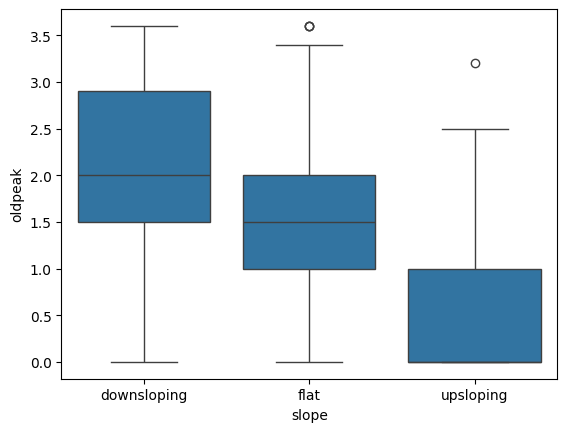

In [91]:
import seaborn as sns # Import the seaborn library

# Use seaborn's boxplot function which supports x, y, and data arguments
sns.boxplot(x='slope', y='oldpeak', data=df)
plt.show()

In [92]:
# Assuming df is your DataFrame and it's already loaded
# Replace this with your actual DataFrame loading code if needed
# df = pd.read_csv('your_data.csv')

# Check for null values in the 'slope' column
null_slope_indices = df[df['slope'].isnull()].index

# Iterate through the indices where 'slope' is null and fill based on 'oldpeak'
for index in null_slope_indices:
    oldpeak_value = df.loc[index, 'oldpeak']

    if 0 <= oldpeak_value < 1:
        df.loc[index, 'slope'] = 'upsloping'
    elif 1 <= oldpeak_value <= 2:
        df.loc[index, 'slope'] = 'flat'
    else:
        df.loc[index, 'slope'] = 'downsloping'

# Verify the changes by checking for null values in 'slope' again
print("Null values in 'slope' after filling:")
print(df['slope'].isnull().sum())

# Display the updated rows where 'slope' was null
print("\nRows where 'slope' was filled:")
print(df.loc[null_slope_indices])

Null values in 'slope' after filling:
0

Rows where 'slope' was filled:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
303  304   28    Male      Cleveland  atypical angina     130.0  132.0  False   
304  305   29    Male        Hungary  atypical angina     120.0  243.0  False   
306  307   30  Female        Hungary   typical angina     170.0  237.0  False   
307  308   31  Female        Hungary  atypical angina     100.0  219.0  False   
308  309   32  Female        Hungary  atypical angina     105.0  198.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
913  914   62    Male  VA Long Beach     asymptomatic     158.0  170.0  False   
914  915   46    Male  VA Long Beach     asymptomatic     134.0  310.0  False   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919  920   62    Male  VA Long Beach 

In [93]:
df['slope'].value_counts()

,count
slope,
upsloping,348
flat,248
downsloping,32


In [95]:
df['thal']=df['thal'].fillna('normal')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        628 non-null    int64  
 1   age       628 non-null    int64  
 2   sex       628 non-null    object 
 3   dataset   628 non-null    object 
 4   cp        628 non-null    object 
 5   trestbps  628 non-null    float64
 6   chol      628 non-null    float64
 7   fbs       620 non-null    object 
 8   restecg   628 non-null    object 
 9   thalch    628 non-null    float64
 10  exang     628 non-null    object 
 11  oldpeak   628 non-null    float64
 12  slope     628 non-null    object 
 13  thal      628 non-null    object 
 14  num       628 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 94.7+ KB


<Axes: xlabel='sex', ylabel='count'>

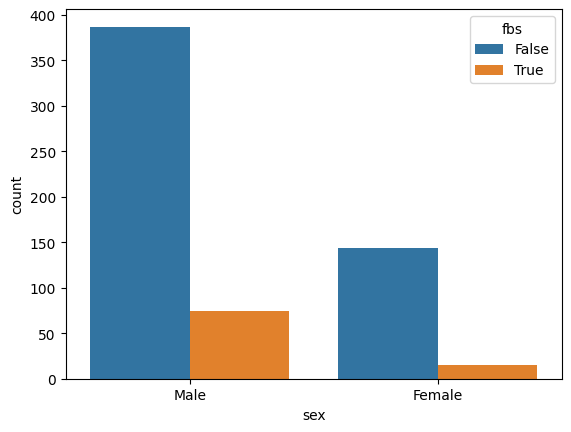

In [99]:
sns.countplot(x='sex',hue='fbs',data =df)

<Axes: xlabel='fbs', ylabel='age'>

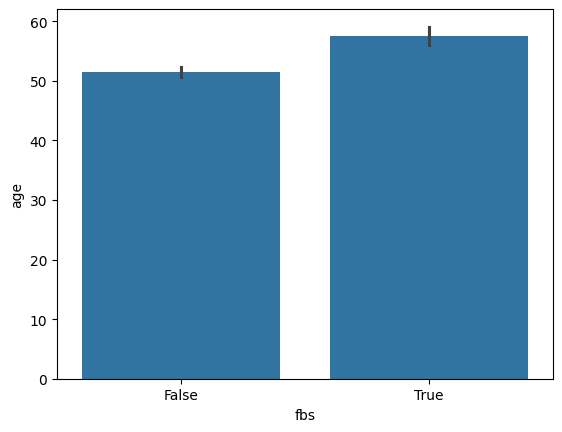

In [101]:
sns.barplot(y = 'age',x='fbs',data = df)

In [111]:
df = df.dropna()

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
lb = LabelEncoder()

In [113]:
categorical_col = ['sex','cp','fbs','restecg','exang','slope','thal']

In [114]:
for col in categorical_col:
  df[col] = lb.fit_transform(df[col])

<ipython-input-114-b766e1e8dba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lb.fit_transform(df[col])
<ipython-input-114-b766e1e8dba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lb.fit_transform(df[col])
<ipython-input-114-b766e1e8dba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [115]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,1,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,3,67,1,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,4,37,1,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,5,41,0,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,1,VA Long Beach,0,158.0,170.0,0,2,138.0,1,0.0,2,1,1
914,915,46,1,VA Long Beach,0,134.0,310.0,0,1,126.0,0,0.0,2,1,2
915,916,54,0,VA Long Beach,0,127.0,333.0,1,2,154.0,0,0.0,2,1,1
917,918,55,1,VA Long Beach,0,122.0,223.0,1,2,100.0,0,0.0,2,0,2


In [118]:
df.drop('dataset',axis =1,inplace = True)

<ipython-input-118-b66a23407a4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('dataset',axis =1,inplace = True)


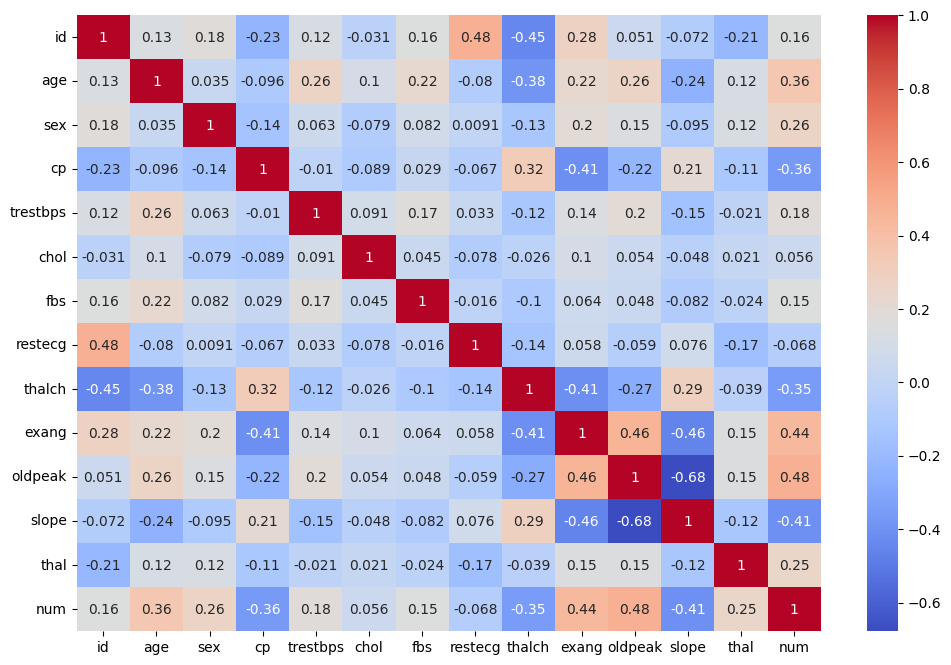

In [121]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot =True,cmap = 'coolwarm')
plt.show()

In [122]:
using_df = df.drop(['fbs','chol','trestbps','id'],axis = 1)

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
s = StandardScaler()

In [125]:
X = df.drop('num',axis =1)
Y = df['num']

In [126]:
X_scaled = s.fit_transform(X)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 42)

In [133]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression()

In [131]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [132]:
lr.score(X_test,Y_test)

0.6370967741935484

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc = RandomForestClassifier()

In [136]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [145]:
rfc.score(X_test,Y_test)

0.6532258064516129